In [1]:
import tensorflow as tf 

In [2]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Activation
from keras.optimizers import Adam

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
(x_train,x_test)=(x_train/255.0,x_test/255.0)

In [4]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(
    input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")])

In [7]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)

In [12]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 33s 16ms/step - loss: 0.6334 - accuracy: 0.8353 - val_loss: 0.3464 - val_accuracy: 0.9047
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3438 - accuracy: 0.9023 - val_loss: 0.2807 - val_accuracy: 0.9228
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2882 - accuracy: 0.9180 - val_loss: 0.2437 - val_accuracy: 0.9315
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2564 - accuracy: 0.9274 - val_loss: 0.2189 - val_accuracy: 0.9376
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2287 - accuracy: 0.9355 - val_loss: 0.1997 - val_accuracy: 0.9436
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2100 - accuracy: 0.9406 - val_loss: 0.1842 - val_accuracy: 0.9475
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1930 - accuracy: 0.9456 - val_loss: 0.1710 -

In [13]:
%reload_ext tensorboard


In [14]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 8324), started 5 days, 0:56:32 ago. (Use '!kill 8324' to kill it.)

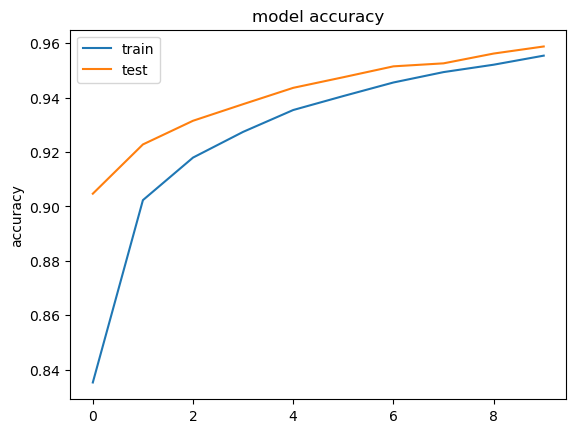

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

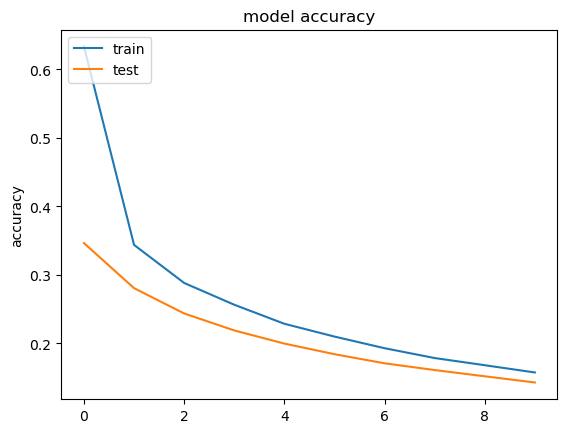

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()